In [28]:
import importlib
import pandas as pd
import numpy as np
import os
import py_vollib_vectorized
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from collections import OrderedDict

In [29]:
import classes, utils, iv_models
_ = importlib.reload(classes)
_ = importlib.reload(utils)
_ = importlib.reload(iv_models)

from classes import Ticker, result_df
from utils import create_market_state
from iv_models import BasicMidIVPolynomial, MidIV

In [10]:
tickers = ['AARTIIND', 'ABFRL', 'ACC', 'ADANIENT', 'ADANIPORTS', 'ALKEM', 'AMARAJABAT', 'AMBUJACEM', 'APLLTD', 'APOLLOHOSP', 'APOLLOTYRE', 'ASHOKLEY', 'ASIANPAINT', 'ASTRAL', 'AUBANK', 'AUROPHARMA', 'AXISBANK', 'BAJAJFINSV', 'BAJAJ_AUTO', 'BAJFINANCE', 'BALKRISIND', 'BANDHANBNK', 'BANKBARODA', 'BATAINDIA', 'BEL', 'BERGEPAINT', 'BHARATFORG', 'BHARTIARTL', 'BHEL', 'BIOCON', 'BOSCHLTD', 'BPCL', 'BRITANNIA', 'CADILAHC', 'CANBK', 'CHOLAFIN', 'CIPLA', 'COALINDIA', 'COFORGE', 'COLPAL', 'CONCOR', 'COROMANDEL', 'CUB', 'CUMMINSIND', 'DABUR', 'DEEPAKNTR', 'DIVISLAB', 'DLF', 'DRREDDY', 'EICHERMOT', 'ESCORTS', 'EXIDEIND', 'FEDERALBNK', 'GAIL', 'GLENMARK', 'GMRINFRA', 'GODREJCP', 'GODREJPROP', 'GRANULES', 'GRASIM', 'GUJGASLTD', 'HAVELLS', 'HCLTECH', 'HDFC', 'HDFCAMC', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDPETRO', 'HINDUNILVR', 'IBULHSGFIN', 'ICICIBANK', 'ICICIGI', 'ICICIPRULI', 'IDEA', 'IDFCFIRSTB', 'IGL', 'INDHOTEL', 'INDIGO', 'INDUSINDBK', 'INDUSTOWER', 'INFY', 'IOC', 'IRCTC', 'ITC', 'JINDALSTEL', 'JSWSTEEL', 'JUBLFOOD', 'KOTAKBANK', 'LALPATHLAB', 'LICHSGFIN', 'LT', 'LTI', 'LTTS', 'LUPIN', 'L_TFH', 'MANAPPURAM', 'MARICO', 'MARUTI', 'MCDOWELL_N', 'METROPOLIS', 'MFSL', 'MGL', 'MINDTREE', 'MOTHERSUMI', 'MPHASIS', 'MRF', 'MUTHOOTFIN', 'M_M', 'M_MFIN', 'NAM_INDIA', 'NATIONALUM', 'NAUKRI', 'NAVINFLUOR', 'NESTLEIND', 'NMDC', 'NTPC', 'ONGC', 'PAGEIND', 'PEL', 'PETRONET', 'PFC', 'PFIZER', 'PIDILITIND', 'PIIND', 'PNB', 'POWERGRID', 'PVR', 'RAMCOCEM', 'RBLBANK', 'RECLTD', 'RELIANCE', 'SAIL', 'SBILIFE', 'SBIN', 'SHREECEM', 'SIEMENS', 'SRF', 'SRTRANSFIN', 'STAR', 'SUNPHARMA', 'SUNTV', 'TATACHEM', 'TATACONSUM', 'TATAMOTORS', 'TATAPOWER', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'TORNTPHARM', 'TORNTPOWER', 'TRENT', 'TVSMOTOR', 'UBL', 'ULTRACEMCO', 'UPL', 'VEDL', 'VOLTAS', 'WIPRO', 'ZEEL']

In [18]:
oc_pairs = []

for tname in tickers:
    print(tname)
    try:
        t = Ticker(tname, expiry_date="20210826")
        oc1 = t.get_option_chain('20210805 15:15:00')
        oc2 = t.get_option_chain('20210806 10:00:00')
        oc_pairs.append((tname, t, oc1, oc2))
    except Exception as e:
        print(e)

AARTIIND
globbing ./data/*/*_AARTIIND21AUG*.csv
loading data from ./data/20210805/influxOP_AARTIIND21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_AARTIIND21AUG_20210806.csv
2021-08-26 20:00:00
ABFRL
globbing ./data/*/*_ABFRL21AUG*.csv
loading data from ./data/20210811/influxOP_ABFRL21AUG_20210811.csv
2021-08-26 20:00:00
loading data from ./data/20210805/influxOP_ABFRL21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_ABFRL21AUG_20210806.csv
2021-08-26 20:00:00
ACC
globbing ./data/*/*_ACC21AUG*.csv
loading data from ./data/20210805/influxOP_ACC21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_ACC21AUG_20210806.csv
2021-08-26 20:00:00
ADANIENT
globbing ./data/*/*_ADANIENT21AUG*.csv
loading data from ./data/20210805/influxOP_ADANIENT21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_ADANIENT21AUG_20210806.csv
2021-08-26 20:00:00
ADANIPORTS
globbing ./data/*/*_AD

2021-08-26 20:00:00
CIPLA
globbing ./data/*/*_CIPLA21AUG*.csv
loading data from ./data/20210805/influxOP_CIPLA21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_CIPLA21AUG_20210806.csv
2021-08-26 20:00:00
COALINDIA
globbing ./data/*/*_COALINDIA21AUG*.csv
loading data from ./data/20210805/influxOP_COALINDIA21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_COALINDIA21AUG_20210806.csv
2021-08-26 20:00:00
COFORGE
globbing ./data/*/*_COFORGE21AUG*.csv
loading data from ./data/20210805/influxOP_COFORGE21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_COFORGE21AUG_20210806.csv
2021-08-26 20:00:00
COLPAL
globbing ./data/*/*_COLPAL21AUG*.csv
loading data from ./data/20210805/influxOP_COLPAL21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_COLPAL21AUG_20210806.csv
2021-08-26 20:00:00
CONCOR
globbing ./data/*/*_CONCOR21AUG*.csv
loading data from ./data/20210805/influxOP_C

2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_ICICIBANK21AUG_20210806.csv
2021-08-26 20:00:00
ICICIGI
globbing ./data/*/*_ICICIGI21AUG*.csv
loading data from ./data/20210805/influxOP_ICICIGI21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_ICICIGI21AUG_20210806.csv
2021-08-26 20:00:00
ICICIPRULI
globbing ./data/*/*_ICICIPRULI21AUG*.csv
loading data from ./data/20210805/influxOP_ICICIPRULI21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_ICICIPRULI21AUG_20210806.csv
2021-08-26 20:00:00
IDEA
globbing ./data/*/*_IDEA21AUG*.csv
loading data from ./data/20210805/influxOP_IDEA21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_IDEA21AUG_20210806.csv
2021-08-26 20:00:00
IDFCFIRSTB
globbing ./data/*/*_IDFCFIRSTB21AUG*.csv
loading data from ./data/20210805/influxOP_IDFCFIRSTB21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_IDFCFIRSTB21AUG_20210806.csv
2

2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_M_M21AUG_20210806.csv
2021-08-26 20:00:00
M_MFIN
globbing ./data/*/*_M_MFIN21AUG*.csv
loading data from ./data/20210805/influxOP_M_MFIN21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_M_MFIN21AUG_20210806.csv
2021-08-26 20:00:00
NAM_INDIA
globbing ./data/*/*_NAM_INDIA21AUG*.csv
loading data from ./data/20210805/influxOP_NAM_INDIA21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_NAM_INDIA21AUG_20210806.csv
2021-08-26 20:00:00
NATIONALUM
globbing ./data/*/*_NATIONALUM21AUG*.csv
loading data from ./data/20210805/influxOP_NATIONALUM21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_NATIONALUM21AUG_20210806.csv
2021-08-26 20:00:00
NAUKRI
globbing ./data/*/*_NAUKRI21AUG*.csv
loading data from ./data/20210805/influxOP_NAUKRI21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_NAUKRI21AUG_20210806.csv
2021-08

2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_TATAPOWER21AUG_20210806.csv
2021-08-26 20:00:00
TATASTEEL
globbing ./data/*/*_TATASTEEL21AUG*.csv
loading data from ./data/20210805/influxOP_TATASTEEL21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_TATASTEEL21AUG_20210806.csv
2021-08-26 20:00:00
TCS
globbing ./data/*/*_TCS21AUG*.csv
loading data from ./data/20210805/influxOP_TCS21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_TCS21AUG_20210806.csv
2021-08-26 20:00:00
TECHM
globbing ./data/*/*_TECHM21AUG*.csv
loading data from ./data/20210805/influxOP_TECHM21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_TECHM21AUG_20210806.csv
2021-08-26 20:00:00
TITAN
globbing ./data/*/*_TITAN21AUG*.csv
loading data from ./data/20210805/influxOP_TITAN21AUG_20210805.csv
2021-08-26 20:00:00
loading data from ./data/20210806/influxOP_TITAN21AUG_20210806.csv
2021-08-26 20:00:00
TORNTPHARM
globbi

In [23]:
res_dfs = []

for (tname, t, oc1, oc2) in oc_pairs:
    oc1.fit_iv_model(BasicMidIVPolynomial(4))
    oc2.fit_iv_model(BasicMidIVPolynomial(4))
    res_dfs.append(result_df(oc1, oc2))

/Users/garg/code/irage/irage-assignment/work/classes.py:38: RankWarning: Polyfit may be poorly conditioned
  self.iv_model.fit(self)
/Users/garg/code/irage/irage-assignment/work/classes.py:38: RankWarning: Polyfit may be poorly conditioned
  self.iv_model.fit(self)


In [24]:
pe_delta_exposure = pd.DataFrame(index=res_dfs[0].index)
pe_option_price   = pd.DataFrame(index=res_dfs[0].index)

for i, (tname, t, oc1, oc2) in enumerate(oc_pairs):
    pe_delta_exposure[tname] = res_dfs[i]['%_pe_delta_exposure']
    pe_option_price[tname] = res_dfs[i]['%_pe_option_price']

In [69]:
def get_errors(df):
    d = OrderedDict()
    d['OTM puts'] = (-0.15, 0.05)
    d['ATM'] = (-0.05, 0.05)
    d['OTM'] = ( 0.05, 0.15)
    
    result = {'ALL' : []}
    for k, vals in d.items():
        errors = df[(df.index <= vals[1]) & (df.index >= vals[0])].values.flatten()

        result[k] = errors[(errors >= np.quantile(errors, 0.025)) 
                         & (errors <= np.quantile(errors, 0.975))]
    
        result['ALL'] = np.append(result['ALL'], result[k])
        
    return result

In [70]:
err = get_errors(pe_delta_exposure)

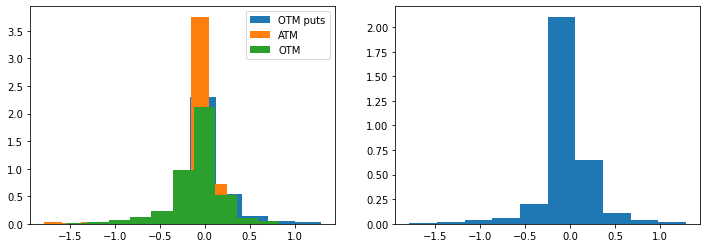

In [72]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

for k, vals in err.items():
    if k == "ALL":
        continue
    axs[0].hist(vals, density=True)

axs[0].legend(list(err.keys())[1:])
_ = axs[1].hist(err['ALL'], density=True)

In [75]:
describe_cols = []
for k, vals in err.items():
    describe_cols.append(pd.DataFrame(vals, columns=[k]).describe(percentiles=[]))
pd.concat(describe_cols, axis=1) 

,ALL,OTM puts,ATM,OTM
count,6308.000000,3078.000000,1538.000000,1692.000000
mean,-0.018311,0.029369,-0.049030,-0.077124
std,0.284575,0.299905,0.232448,0.284279
min,-1.787850,-1.623896,-1.787850,-1.541843
50%,-0.002585,0.004318,-0.004146,-0.027805
max,1.290116,1.290116,0.252960,0.827401


In [60]:
pd.concat([pd.DataFrame(err['ALL'], columns=['ALL']).describe(), pd.DataFrame(err['ALL'], columns=['ALL']).describe()], axis=1)

,ALL,ALL
count,6308.000000,6308.000000
mean,-0.018311,-0.018311
std,0.284575,0.284575
min,-1.787850,-1.787850
25%,-0.071532,-0.071532
50%,-0.002585,-0.002585
75%,0.059725,0.059725
max,1.290116,1.290116


In [26]:
import seaborn as sns

